<a href="https://colab.research.google.com/github/Sakib-Dalal/AIES_LAB/blob/main/Exp_02_Impact%20of%20Data%20Quality%20on%20AI%20Fairness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Impact of Data Quality on AI Fairness

In [1]:
!pip install fairlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 4.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from fairlearn.metrics import MetricFrame, selection_rate

In [3]:
data= pd.read_csv("https://data.cityofnewyork.us/resource/vx8i-nprf.csv")

In [4]:
print(data.columns.values)

['exam_no' 'list_no' 'first_name' 'mi' 'last_name' 'adj_fa'
 'list_title_code' 'list_title_desc' 'group_no' 'list_agency_code'
 'list_agency_desc' 'list_div_code' 'published_date' 'established_date'
 'anniversary_date' 'extension_date' 'veteran_credit' 'parent_lgy_credit'
 'sibling_lgy_credit' 'residency_credit']


In [5]:
# Preprocess
data = data[['adj_fa', 'list_title_desc', 'list_agency_desc', 'veteran_credit', 'parent_lgy_credit', 'sibling_lgy_credit', 'residency_credit']]
data = pd.get_dummies(data, drop_first=True)
#data = pd.get_dummies(data)

In [6]:
print(data.columns.values)

['adj_fa' 'list_title_desc_ADMINISTRATIVE COMMUNITY RELATIONS SPECIALIST'
 'list_title_desc_ADMINISTRATIVE CONTRACT SPECIALIST'
 'list_title_desc_ADMINISTRATIVE DIRECTOR OF SOCIAL SERVICES'
 'list_title_desc_ADMINISTRATIVE EDUCATION ANALYST'
 'list_title_desc_ADMINISTRATIVE EDUCATION OFFICER'
 'list_title_desc_ADMINISTRATIVE HOUSING MANAGER'
 'list_title_desc_ADMINISTRATIVE HOUSING SUPERINTENDENT'
 'list_title_desc_ADMINISTRATIVE MANAGEMENT AUDITOR'
 'list_title_desc_ADMINISTRATIVE MANAGER'
 'list_title_desc_ADMINISTRATIVE PARK AND RECREATION MANAGER'
 'list_title_desc_ADMINISTRATIVE PROCUREMENT ANALYST'
 'list_title_desc_ADMINISTRATIVE PROJECT MANAGER'
 'list_title_desc_ADMINISTRATIVE QUALITY ASSURANCE SPECIALIST'
 'list_title_desc_ADMINISTRATIVE STAFF ANALYST'
 'list_title_desc_ASSISTANT CITY ASSESSOR'
 'list_title_desc_ASSISTANT CIVIL ENGINEER'
 'list_title_desc_ASSISTANT HOUSING MANAGER'
 'list_title_desc_ASSISTANT PLAN EXAMINER (BUILDINGS)'
 'list_title_desc_ASSISTANT SUPERINTENDE

In [7]:
# Split data into sensitive features and other features
X = data.drop('adj_fa', axis=1)
y = data['adj_fa']

# Binarize the target variable
y = (y > y.mean()).astype(int)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy}")

Model accuracy: 0.66


In [8]:
X_test.head()

,list_title_desc_ADMINISTRATIVE COMMUNITY RELATIONS SPECIALIST,list_title_desc_ADMINISTRATIVE CONTRACT SPECIALIST,list_title_desc_ADMINISTRATIVE DIRECTOR OF SOCIAL SERVICES,list_title_desc_ADMINISTRATIVE EDUCATION ANALYST,list_title_desc_ADMINISTRATIVE EDUCATION OFFICER,list_title_desc_ADMINISTRATIVE HOUSING MANAGER,list_title_desc_ADMINISTRATIVE HOUSING SUPERINTENDENT,list_title_desc_ADMINISTRATIVE MANAGEMENT AUDITOR,list_title_desc_ADMINISTRATIVE MANAGER,list_title_desc_ADMINISTRATIVE PARK AND RECREATION MANAGER,...,list_agency_desc_FIRE DEPARTMENT,list_agency_desc_HRA/DEPARTMENT OF SOCIAL SERVICES,list_agency_desc_N.Y.C. HOUSING AUTHORITY,list_agency_desc_N.Y.C. TRANSIT AUTHORITY,list_agency_desc_OFFICE OF PAYROLL ADMINISTRATION,list_agency_desc_OPEN COMPETITIVE,list_agency_desc_POLICE DEPARTMENT,list_agency_desc_QUALIFIED INCUMBENT,list_agency_desc_TAXI AND LIMOUSINE COMMISSION,veteran_credit_Veteran's Credit
521,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
737,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
740,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
660,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
411,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [12]:
X_test.columns

Index(['list_title_desc_ADMINISTRATIVE COMMUNITY RELATIONS SPECIALIST',
       'list_title_desc_ADMINISTRATIVE CONTRACT SPECIALIST',
       'list_title_desc_ADMINISTRATIVE DIRECTOR OF SOCIAL SERVICES',
       'list_title_desc_ADMINISTRATIVE EDUCATION ANALYST',
       'list_title_desc_ADMINISTRATIVE EDUCATION OFFICER',
       'list_title_desc_ADMINISTRATIVE HOUSING MANAGER',
       'list_title_desc_ADMINISTRATIVE HOUSING SUPERINTENDENT',
       'list_title_desc_ADMINISTRATIVE MANAGEMENT AUDITOR',
       'list_title_desc_ADMINISTRATIVE MANAGER',
       'list_title_desc_ADMINISTRATIVE PARK AND RECREATION MANAGER',
       ...
       'list_agency_desc_FIRE DEPARTMENT',
       'list_agency_desc_HRA/DEPARTMENT OF SOCIAL SERVICES',
       'list_agency_desc_N.Y.C. HOUSING AUTHORITY',
       'list_agency_desc_N.Y.C. TRANSIT AUTHORITY',
       'list_agency_desc_OFFICE OF PAYROLL ADMINISTRATION',
       'list_agency_desc_OPEN COMPETITIVE',
       'list_agency_desc_POLICE DEPARTMENT',
       'list_

<Axes: title={'center': 'Selection Rate by Veteran Status'}, xlabel="veteran_credit_Veteran's Credit", ylabel='Selection Rate'>

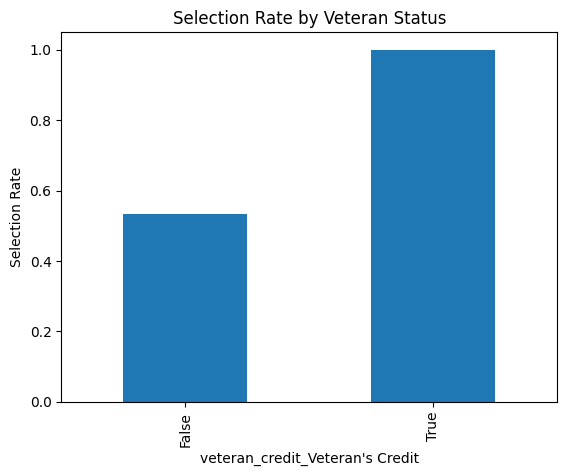

In [13]:
# Create a MetricFrame
metric_frame = MetricFrame(metrics=selection_rate,
                           y_true=y_test,
                           y_pred=y_pred,
                           sensitive_features=X_test["veteran_credit_Veteran's Credit"])

# Plot the selection rates
metric_frame.by_group.plot.bar(
    legend=False,
    ylabel="Selection Rate",
    title="Selection Rate by Veteran Status",
)

In [14]:
from fairlearn.reductions import ExponentiatedGradient, DemographicParity
from fairlearn.metrics import MetricFrame, selection_rate

In [15]:
# Define base estimator
estimator = LogisticRegression(max_iter=1000)

# Train the estimator
estimator.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [16]:
# Apply fairness constraint: Demographic Parity
fair_model = ExponentiatedGradient(
    estimator,
    constraints=DemographicParity(),
    eps=0.01  # fairness tolerance
)

In [17]:
# Define sensitive features for the test set
sf_test = X_test["veteran_credit_Veteran's Credit"]

# Evaluate fairness and accuracy
metric_frame = MetricFrame(
    metrics={
        "Selection Rate": selection_rate,
        "Accuracy": accuracy_score
    },
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=sf_test
)

# Print the overall and by-group metrics
print("Overall metrics:")
print(metric_frame.overall)
print("\nMetrics by group:")
print(metric_frame.by_group)
print("\nOverall Accuracy:", accuracy_score(y_test, y_pred))


Overall metrics:
Selection Rate    0.55
Accuracy          0.66
dtype: float64

Metrics by group:
                                 Selection Rate  Accuracy
veteran_credit_Veteran's Credit                          
False                                  0.533679  0.658031
True                                   1.000000  0.714286

Overall Accuracy: 0.66


Based on the analysis, the model has an overall accuracy of 66%. However, the fairness metrics reveal a significant disparity in the selection rate between individuals with and without veteran's credit. The selection rate for those with veteran's credit is 100%, while for those without it is approximately 53%. This suggests a potential fairness issue related to veteran status in the model's predictions.